In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('E:/Kaggle/Housing Prices Competitio/Data/train.csv')
test = pd.read_csv('E:/Kaggle/Housing Prices Competitio/Data/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
print ("Size of train data : {}".format(train.shape))
print ("Size of test data : {}".format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [4]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [5]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [6]:
print ("Size of train data after dropping Id: {}".format(train.shape))
print ("Size of test data after dropping Id: {}".format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


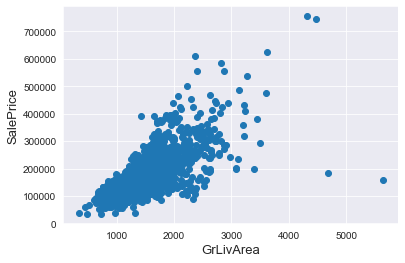

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)
plt.show()

In [8]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


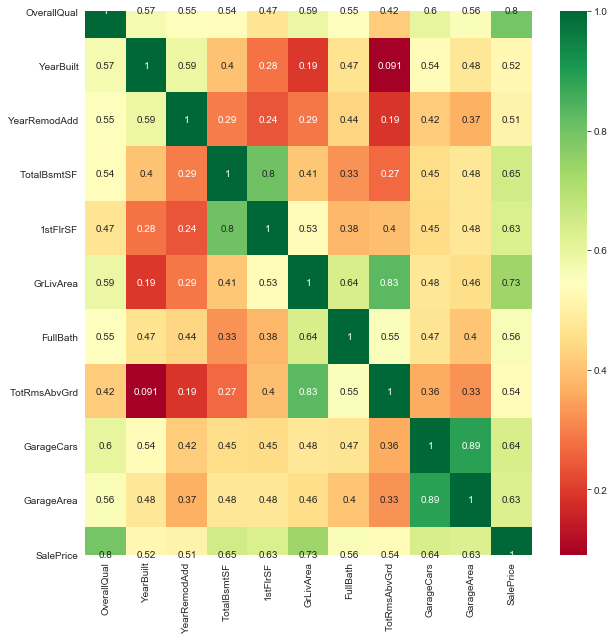

In [9]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>0.5]
print(top_corr_features)
plt.figure(figsize = (10, 10))
g = sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='RdYlGn')

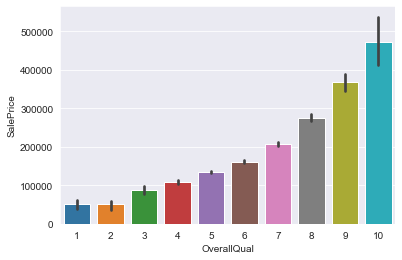

In [10]:
sns.barplot(train.OverallQual, train.SalePrice)

Scatter plots between 'SalePrice' and correlated variables

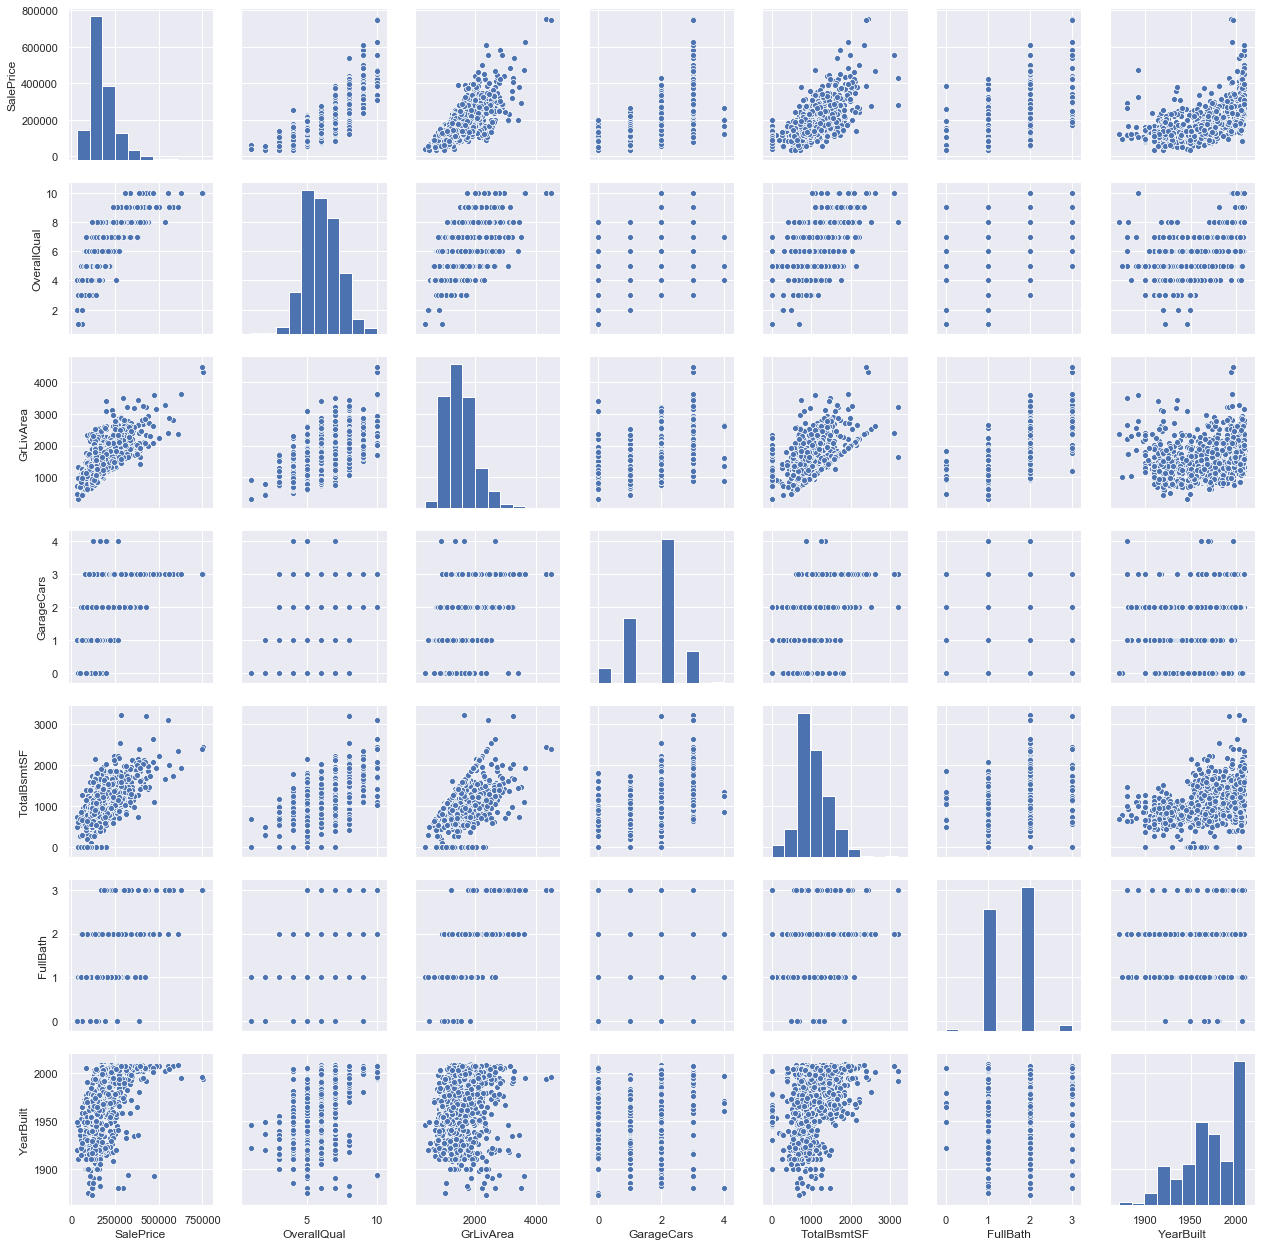

In [11]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

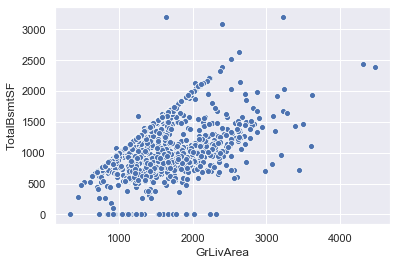

In [12]:
sns.scatterplot(train.GrLivArea, train.TotalBsmtSF)


 mu = 180932.919067 and sigma = 79467.788930



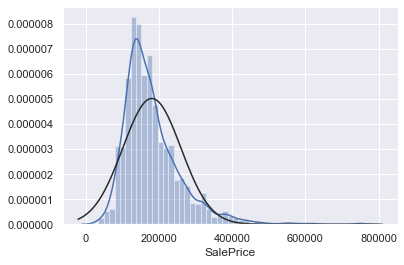

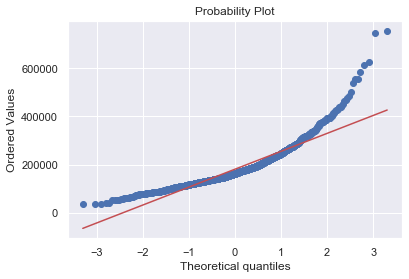

In [13]:
def check_skewness(col):
    sns.distplot(train[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(train[col], plot = plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print("\n mu = {:2f} and sigma = {:2f}\n".format(mu, sigma))

check_skewness("SalePrice")


 mu = 12.024015 and sigma = 0.399576



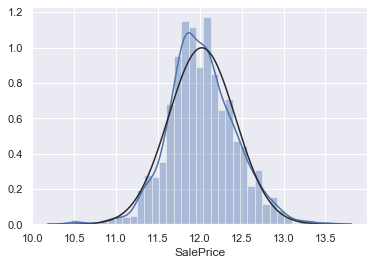

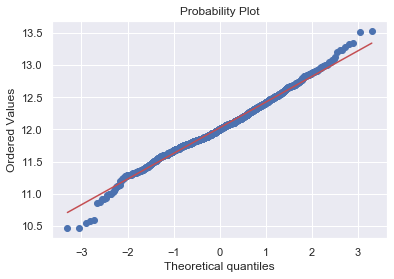

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

check_skewness("SalePrice")

Concatenate both train and test values.

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]


In [16]:
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Missing Data

In [57]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
print(all_data_na)

1stFlrSF          0.0
2ndFlrSF          0.0
3SsnPorch         0.0
Alley             0.0
BedroomAbvGr      0.0
                 ... 
SaleType_ConLI    0.0
SaleType_ConLw    0.0
SaleType_New      0.0
SaleType_Oth      0.0
SaleType_WD       0.0
Length: 220, dtype: float64


All features with missing data

In [18]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
print(all_data_na)

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
dtype: float64


Insert name of column

In [19]:
missing_data = pd.DataFrame({'Missing ratio' : all_data_na})
print(missing_data)

              Missing ratio
PoolQC            99.691464
MiscFeature       96.400411
Alley             93.212204
Fence             80.425094
FireplaceQu       48.680151
LotFrontage       16.660953
GarageQual         5.450806
GarageCond         5.450806
GarageFinish       5.450806
GarageYrBlt        5.450806
GarageType         5.382242
BsmtExposure       2.811107
BsmtCond           2.811107
BsmtQual           2.776826
BsmtFinType2       2.742544
BsmtFinType1       2.708262
MasVnrType         0.822763
MasVnrArea         0.788481
MSZoning           0.137127
BsmtFullBath       0.068564
BsmtHalfBath       0.068564
Utilities          0.068564
Functional         0.068564
Electrical         0.034282
BsmtUnfSF          0.034282
Exterior1st        0.034282
Exterior2nd        0.034282
TotalBsmtSF        0.034282
GarageArea         0.034282
GarageCars         0.034282


Text(0.5, 1.0, 'Percent missing data by feature')

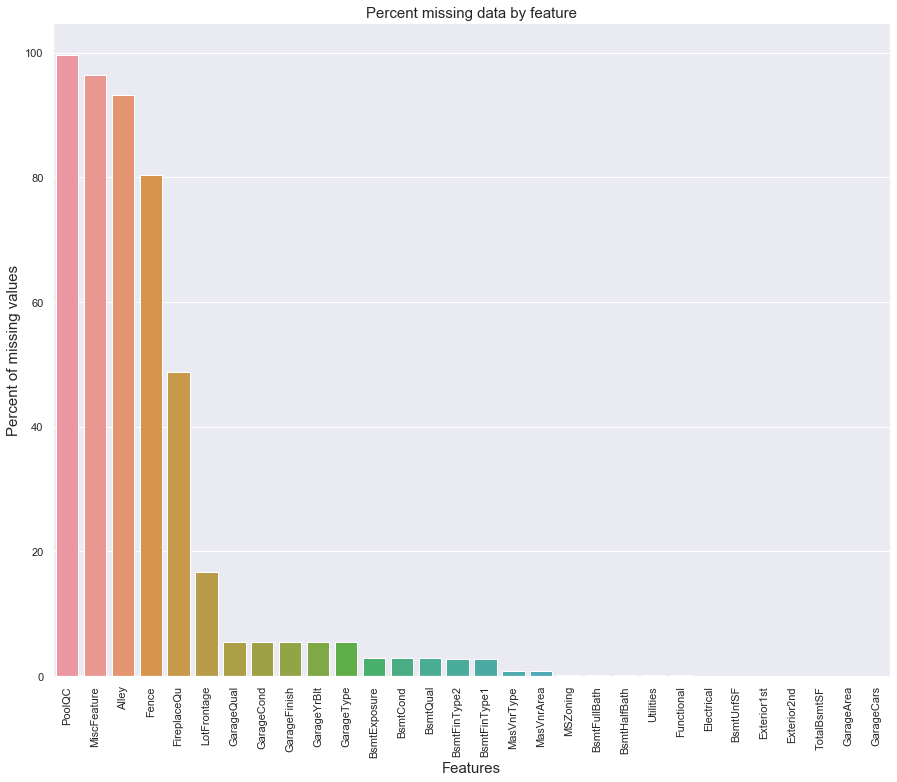

In [20]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [21]:
all_data.PoolQC.loc[all_data.PoolQC.notnull()]

197     Ex
809     Fa
1169    Gd
1181    Ex
1384    Fa
1421    Gd
1972    Ex
2571    Ex
2708    Gd
Name: PoolQC, dtype: object

Handle Missing Data

In [22]:
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

In [23]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")

In [24]:
all_data['Alley'] = all_data['Alley'].fillna("None")

In [25]:
all_data['Fence'] = all_data['Fence'].fillna("None")

In [26]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [28]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna("None")

In [29]:
abc = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt', 'GarageArea', 'GarageCars']
all_data.groupby('GarageType')[abc].count()

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
GarageType,,,,,,,
2Types,23,23,23,23,23,23,23
Attchd,1722,1722,1722,1722,1722,1722,1722
Basment,36,36,36,36,36,36,36
BuiltIn,185,185,185,185,185,185,185
CarPort,15,15,15,15,15,15,15
Detchd,779,779,779,779,777,778,778
None,157,157,157,157,0,157,157


In [30]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [32]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [33]:
all_data["MSZoning"].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

RL' is by far the most common value. So we can fill in missing values with 'RL'

In [34]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

In [35]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.

In [36]:
all_data = all_data.drop(['Utilities'], axis=1)

In [37]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [38]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [39]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [40]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

check for any missing values

In [41]:
#Check remaining missing values if any 
all_data_na  = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing data":all_data_na})
print(missing_data.head())

Empty DataFrame
Columns: [Missing data]
Index: []


In [42]:
all_data['OverallCond'].value_counts()

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

Converting some numerical variables that are really categorical type.

If we do not convert these to categorical, some model may get affect by this as model will compare the value 1<5<10 . 
We dont need that to happen with our model.

In [43]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [44]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    enc = LabelEncoder()
    enc.fit(list(all_data[c].values))
    all_data[c] = enc.transform(list(all_data[c].values))

In [46]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [47]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Lets see the highly skewed features we have

In [48]:
num_features = all_data.dtypes[all_data.dtypes != 'object'].index

In [49]:
# Check the skew of all numerical features
skewed_features = all_data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewnes = pd.DataFrame({"Skewed" : skewed_features})
print(skewnes.head(15))


Skew in numerical features: 

                  Skewed
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
LandSlope       4.973254
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101
BsmtHalfBath    3.929996
MasVnrArea      2.621719
OpenPorchSF     2.529358
WoodDeckSF      1.844792
1stFlrSF        1.257286


Box Cox Transformation of (highly) skewed features

In [50]:
skewnes = skewnes[abs(skewnes > 0.75)]
print("There are {} skewed numerical features to Box Cox transform".format(skewnes.shape[0]))

from scipy.special import boxcox1p
skwd_features = skewnes.index
lam = 0.15

for f in skwd_features:
    #all_data[f] += 1
    all_data[f] = boxcox1p(all_data[f], lam)

There are 59 skewed numerical features to Box Cox transform


Getting dummy categorical features

In [51]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [52]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)

(1458, 220)


# Apply modeling

Import libraries

In [53]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

Cross Validation

It's simple way to calculate error for evaluation.

In [54]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Modelling

Ridge Regression

In [55]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)

